In [1]:
%cd ~/vishnu/aws_files

/home/ubuntu/vishnu/aws_files


In [2]:
import os
import re
import pandas as pd
import regex
from library import *

In [7]:
df1 = load_dataset("agr_hi_train.csv")
df2 = load_dataset("agr_en_train.csv")
df = pd.concat([df1,df2])
df = preprocess_text(df)
df

,id,message,class
0,facebook_corpus_msr_386695,bhai 60sal pehle desh me kya tha pehle pta kro...,CAG
1,facebook_corpus_msr_373389,chutiya friday ko isliye releae krte kyoki wee...,CAG
2,facebook_corpus_msr_917635,जय मोदीराज,CAG
3,facebook_corpus_msr_382517,upa walo ne bahot kuch kr diya tha desh k liye,CAG
4,facebook_corpus_msr_403274,pan ko aadhar se link ki zarurat kuy hai supre...,CAG
...,...,...,...
11993,facebook_corpus_msr_394638,they belong to you flight dirty terrorist coun...,OAG
11994,facebook_corpus_msr_429177,really motivating programme congratulations to...,NAG
11995,facebook_corpus_msr_2032370,fabricated news,OAG
11996,facebook_corpus_msr_1722926,whats wrong with you secular idiots,OAG


In [8]:
df["message"].fillna('',inplace=True)
df

,id,message,class
0,facebook_corpus_msr_386695,bhai 60sal pehle desh me kya tha pehle pta kro...,CAG
1,facebook_corpus_msr_373389,chutiya friday ko isliye releae krte kyoki wee...,CAG
2,facebook_corpus_msr_917635,जय मोदीराज,CAG
3,facebook_corpus_msr_382517,upa walo ne bahot kuch kr diya tha desh k liye,CAG
4,facebook_corpus_msr_403274,pan ko aadhar se link ki zarurat kuy hai supre...,CAG
...,...,...,...
11993,facebook_corpus_msr_394638,they belong to you flight dirty terrorist coun...,OAG
11994,facebook_corpus_msr_429177,really motivating programme congratulations to...,NAG
11995,facebook_corpus_msr_2032370,fabricated news,OAG
11996,facebook_corpus_msr_1722926,whats wrong with you secular idiots,OAG


In [ ]:
print("Datset size : ",len(df["message"]))
oag_df = df[df["class"]=="OAG"]
cag_df = df[df["class"]=="CAG"]
nag_df = df[df["class"]=="NAG"]
print("OAG size : ",len(oag_df["message"]))
print("CAG size : ",len(cag_df["message"]))
print("NAG size : ",len(nag_df["message"]))

Datset size :  23997
OAG size :  7562
CAG size :  9109
NAG size :  7326


In [ ]:
df1 = load_dataset("agr_hi_dev.csv")
df2 = load_dataset("agr_en_dev.csv")
val_df = pd.concat([df1,df2])
val_df = preprocess_text(val_df)
y_train = df["class"]
y_test = val_df["class"]
y_train

0        CAG
1        CAG
2        CAG
3        CAG
4        CAG
        ... 
11993    OAG
11994    NAG
11995    OAG
11996    OAG
11997    NAG
Name: class, Length: 23997, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import regex
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn import metrics

In [ ]:
tfidf_vectorizer = TfidfVectorizer(analyzer=custom_analyzer) 
tfidf_vectorizer.fit(df["message"])

TfidfVectorizer(analyzer=<function custom_analyzer at 0x7f8940328e50>)

In [ ]:
#train features
x_train = tfidf_vectorizer.transform(df["message"])
#encode labels
labels = df["class"]

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
labels_encoded=le.fit_transform(labels)
#train with Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(x_train, labels_encoded)

MultinomialNB()

{'CAG': 0, 'NAG': 1, 'OAG': 2}
accuracy:   0.570
confusion matrix:


<AxesSubplot:>

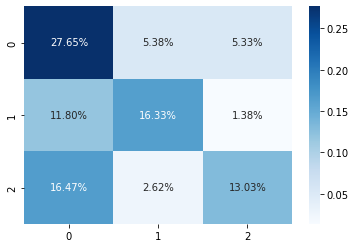

In [ ]:
import seaborn as sns
import numpy as np

x_test = tfidf_vectorizer.transform(val_df["message"])
#encode labels
labels = y_test
labels_encoded=le.fit_transform(labels)
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
y_pred=naive_bayes_classifier.predict(x_test)
score1 = metrics.accuracy_score(labels_encoded, y_pred)
print("accuracy:   %0.3f" % score1)

print("confusion matrix:")
cf_matrix = metrics.confusion_matrix(labels_encoded, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')


In [ ]:

def embedding_evaluation(x_train,x_test,y_train,y_test):
  tfidf_vectorizer = TfidfVectorizer(analyzer=custom_analyzer) 
  tfidf_vectorizer.fit(x_train)
  #train features
  x_train = tfidf_vectorizer.transform(x_train)
  #encode labels
  labels = y_train

  #creating labelEncoder
  le = preprocessing.LabelEncoder()
  # Converting string labels into numbers.
  labels_encoded=le.fit_transform(labels)
  #train with Naive Bayes
  naive_bayes_classifier = MultinomialNB()
  naive_bayes_classifier.fit(x_train, labels_encoded)

  #encode labels
  x_test = tfidf_vectorizer.transform(x_test)
  labels = y_test
  labels_encoded=le.transform(labels)
  le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
  print(le_name_mapping)
  print("x_test shape : ",x_test.shape)
  y_pred=naive_bayes_classifier.predict(x_test)
  score1 = metrics.accuracy_score(labels_encoded, y_pred)
  print("accuracy:   %0.3f" % score1)

  print("confusion matrix:")
  cf_matrix = metrics.confusion_matrix(labels_encoded, y_pred)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  return naive_bayes_classifier,tfidf_vectorizer


In [3]:
def trac1_dataset_preprocess():
  df1 = load_dataset("agr_hi_train.csv")
  df2 = load_dataset("agr_en_train.csv")
  df = pd.concat([df1,df2])
  df = preprocess_text(df)
  df["message"].fillna('',inplace=True)
  df1 = load_dataset("agr_hi_dev.csv")
  df2 = load_dataset("agr_en_dev.csv")
  val_df = pd.concat([df1,df2])
  val_df = preprocess_text(val_df)
  y_train = df["class"]
  y_test = val_df["class"]
  x_train = df["message"]
  x_test = val_df["message"]
  return x_train,x_test,y_train,y_test

{'CAG': 0, 'NAG': 1, 'OAG': 2}
x_test shape :  (6000, 59141)
accuracy:   0.570
confusion matrix:


(MultinomialNB(),
 TfidfVectorizer(analyzer=<function custom_analyzer at 0x7f8940328e50>))

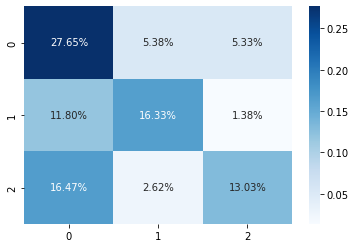

In [ ]:
x_train,x_test,y_train,y_test = trac1_dataset_preprocess()
embedding_evaluation(x_train,x_test,y_train,y_test)

# Lemmatization

In [ ]:
!pip install googletrans==3.1.0a0
import nltk
nltk.download(['wordnet','omw-1.4','averaged_perceptron_tagger'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 6.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=d86b3f6ca417c4a6926158674ba73da3d755f5ea368c301e5dfc6e695239a119
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from googletrans import Translator
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet 

def translate_hindi_in_df(df):
  key = "message"
  translator = Translator()
  sentences = df[key]
  translated = []
  for msg in sentences:
    if detect_lang_unicode(msg)=="en":
      translated.append(msg)
    else:
      translated.append(translator.translate(msg).text)
  new_df = df.copy()
  new_df[key] = translated
  return new_df

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_vocabulary(df):
  lemmatizer = WordNetLemmatizer()
  lemmatized_vocab = {}
  dict2 = {}
  df = translate_hindi_in_df(df)
  translated_df = df
  msgs = list(map( lambda w : str(w).lower()  ,df["message"] ))
  for msg in msgs:
    for word in msg.split():
      lemm =lemmatizer.lemmatize(word,get_wordnet_pos(word))
      if lemm in lemmatized_vocab:
        lemmatized_vocab[lemm].add(word)
      else:
        lemmatized_vocab[lemm] = set()
        lemmatized_vocab[lemm].add(word)
      dict2[word] = lemm 
  return lemmatized_vocab,translated_df,dict2

x_train,x_test,y_train,y_test = trac1_dataset_preprocess()
df = pd.DataFrame()
df["message"] = x_train
lemm_vocab,translated_df,dict2 = lemmatize_vocabulary(df)
print(lemm_vocab)

{'bhai': {'bhai'}, '60sal': {'60sal'}, 'pehle': {'pehle'}, 'desh': {'desh'}, 'me': {'me'}, 'kya': {'kya'}, 'tha': {'tha'}, 'pta': {'pta'}, 'kro': {'kro'}, 'waise': {'waise'}, 'ka': {'kas', 'kass', 'ka'}, 'kaise': {'kaise'}, 'hai': {'hai'}, 'chutiya': {'chutiya'}, 'friday': {'friday'}, 'ko': {'kos', 'ko'}, 'isliye': {'isliye'}, 'releae': {'releae'}, 'krte': {'krte'}, 'kyoki': {'kyoki'}, 'week': {'weeks', 'week'}, 'end': {'ends', 'end', 'ended', 'ending'}, 'ke': {'ke'}, '3': {'3'}, 'din': {'din', 'dining'}, 'milte': {'milte'}, 'h': {'h', 'hs'}, 'to': {'to'}, 'log': {'logging', 'log'}, 'free': {'free'}, 'hokr': {'hokr'}, 'film': {'films', 'film', 'filmed'}, 'dekh': {'dekh'}, 'sake': {'sake'}, 'hd': {'hd'}, 'yrr': {'yrr'}, 'chutiyapa': {'chutiyapa'}, 'ki': {'ki', 'kis'}, 'jai': {'jai'}, 'modiraj': {'modiraj'}, 'upa': {'upa'}, 'walo': {'walo'}, 'ne': {'ne'}, 'bahot': {'bahot'}, 'kuch': {'kuch'}, 'kr': {'kr'}, 'diya': {'diya'}, 'k': {'ks', 'k'}, 'liye': {'liye'}, 'pan': {'pan'}, 'aadhar': {'

In [ ]:


x_train,x_test,y_train,y_test = trac1_dataset_preprocess()
x_train = translate_hindi_in_df(pd.DataFrame({"message":x_train}))["message"]
x_test = translate_hindi_in_df(pd.DataFrame({"message":x_test}))["message"]


In [ ]:
def transform_df_to_lemmatized_words(orig_msgs):
  msgs = []
  for msg in orig_msgs:
    msgstr=""
    for w in msg.split():
      try:
        msgstr+= dict2[w]+" "
      except:
        msgstr += w + " "
    msgs.append(msgstr)
  
  return msgs

x_train = list(map( lambda w : str(w).lower()  ,x_train ))
x_test = list(map( lambda w : str(w).lower()  ,x_test ))
x_train = transform_df_to_lemmatized_words(x_train)
x_test = transform_df_to_lemmatized_words(x_test)
print(x_train)
# embedding_evaluation(x_train,x_test,y_train,y_test)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'CAG': 0, 'NAG': 1, 'OAG': 2}
x_test shape :  (6000, 44887)
accuracy:   0.577
confusion matrix:


(MultinomialNB(),
 TfidfVectorizer(analyzer=<function custom_analyzer at 0x7f8940328e50>))

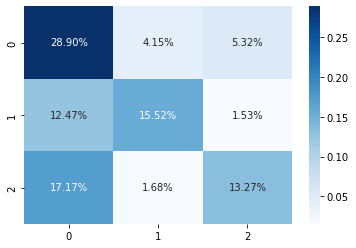

In [ ]:
embedding_evaluation(x_train,x_test,y_train,y_test)